<a href="https://colab.research.google.com/github/nightitachi/Block-Notes/blob/main/lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Data

In [1]:
!pip install pandas numpy matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import random

# Apply the 'ggplot' style
style.use('ggplot')


In [3]:

def create_data(n, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(n):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step

    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)


In [4]:
xs_neg, ys_neg = create_data(100, variance=10, step=2, correlation='neg')


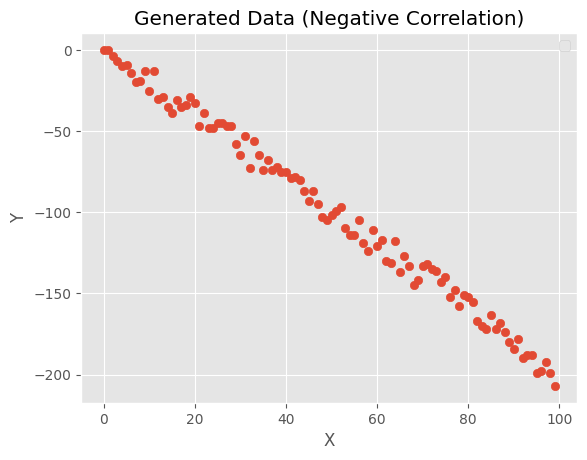

In [5]:
plt.scatter(xs_neg, ys_neg)
plt.title("Generated Data (Negative Correlation)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

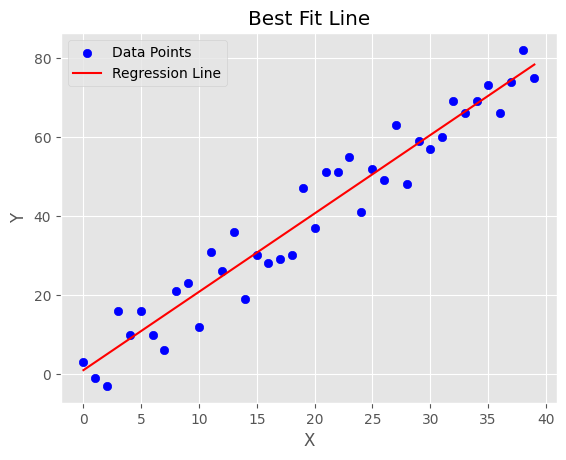

In [6]:
def best_fit_slope_and_intercept(xs, ys):
    m = (((np.mean(xs) * np.mean(ys)) - np.mean(xs * ys)) /
         ((np.mean(xs) ** 2) - np.mean(xs * xs)))
    b = np.mean(ys) - m * np.mean(xs)
    return m, b

xs, ys = create_data(40, variance=10, step=2, correlation='pos')

m, b = best_fit_slope_and_intercept(xs, ys)

regression_line = [(m * x) + b for x in xs]

plt.scatter(xs, ys, color='blue', label='Data Points')
plt.plot(xs, regression_line, color='red', label='Regression Line')
plt.title("Best Fit Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


# Linear Regession of better linf

In [15]:
def coefficient_of_determination(ys_orig , ys_line):
  ys_mean_line = [np.mean(ys_orig) for y in ys_orig]
  squared_error_reg= sum((ys_line - ys_orig)**2)
  squared_error_mean = sum((ys_mean_line - ys_orig)**2)

  re_sq = 1 - squared_error_reg/squared_error_mean

  return re_sq



In [16]:
xs_neg, ys_neg = create_data(100, variance=1, step=2, correlation='neg')


In [17]:
re_sq = coefficient_of_determination(ys , regression_line)
print(re_sq)

0.9393893280344225


# Nonlinear Regression

In [19]:
import requests
url = "https://apmonitor.com/che263/uploads/Main/heart_rate.txt"


In [20]:
response = requests.get(url)

In [21]:
response

<Response [200]>

In [23]:
if response.status_code == 200:
    with open("heart_rate.txt", "w") as file:
        file.write(response.text)
    print("File downloaded and saved as 'heart_rate.txt'")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

File downloaded and saved as 'heart_rate.txt'


In [25]:
import pandas as pd

hr= pd.read_csv('heart_rate.txt')

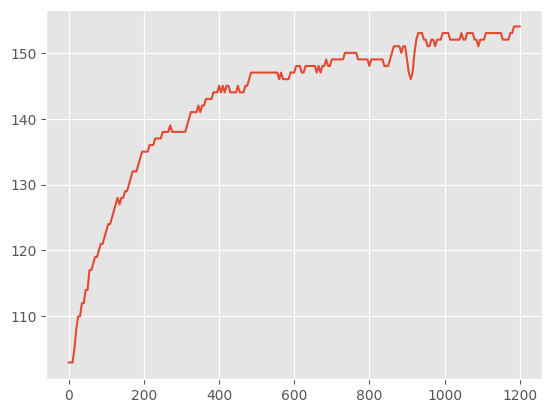

In [27]:
plt.plot(hr['Time (sec)'] , hr['Heart Rate (BPM)'])

In [28]:
def BPM(c0,t , c1 , c2 , c3 ):
  return c0 + c1 -c2*np.exp(-c3*t)

In [39]:
guess = [500 , 0.1 , 80 ,  0.02]

In [40]:
len_ = len(hr['Time (sec)'])
y1= np.zeros(len_)

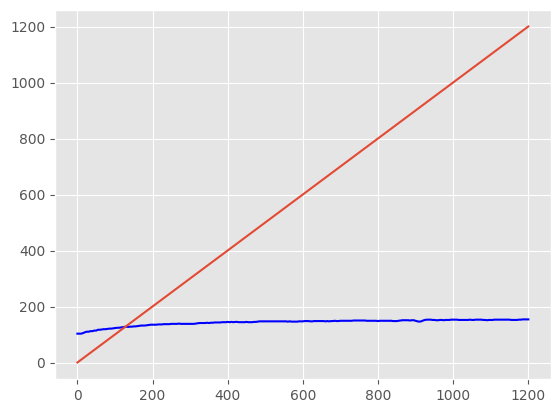

In [41]:
for i in range(len_):
  y1[i] = BPM(hr['Time (sec)'][i] , guess[0] , guess[1] , guess[2] , guess[3])

plt.plot(hr['Time (sec)'] , hr['Heart Rate (BPM)'] , 'b')
plt.plot(hr['Time (sec)'] , y1)